<a href="https://colab.research.google.com/github/ono-sayuri/CursoPython/blob/main/RedeBancaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Você foi contratado por um banco internacional que irá abrir agências no Brasil. Logo você irá elaborar o sistema bancário que eles necessitarão para gerir as contas de seus futuros clientes. Considere as classes a seguir para realizar as atividades:

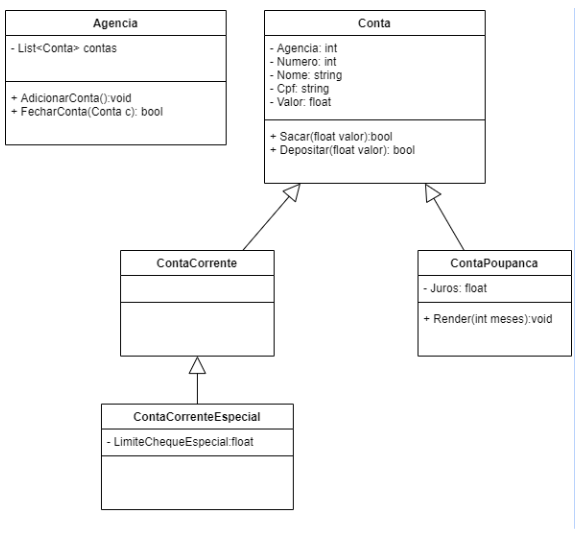


*  Implemente as classes do diagrama.
*  No seu método Main, crie objetos da classe Agencia, Conta, ContaCorrente, ContaPoupanca e ContaCorrenteEspecial
*  Na classe Agencia, crie sobrecargas do Método AdicionarConta, considerando que uma conta já poderia ser aberta com:
    *  Recebendo o objeto conta
    *  Recebendo agência, número, nome e cpf da conta
*  Na classe Agencia, crie sobrecargas do Método FecharConta, considerando que uma conta também pode ser fechada através do:
    *  Recebimento do número da Agencia e Número da conta
    *  Recebimento do número do CPF


In [55]:
# Definir Conta
from abc import ABC, abstractmethod

class Conta(ABC):
  @abstractmethod
  def __init__(self, agencia, numero, nome, cpf, valor = 0):
    self.__agencia = agencia
    self.__numero = numero
    self.__nome = nome
    self.__cpf = cpf
    self.__valor = valor

  @property
  def agencia(self): return self.__agencia
  @property
  def numero(self): return self.__numero
  @property
  def nome(self): return self.__nome
  @property
  def cpf(self): return self.__cpf
  @property
  def valor(self): return self.__valor
  @valor.setter
  def valor(self, value): self.__valor = value

  def __str__(self):
    s = f'{Conta.tipo_str(self)} | Ag: {self.agencia} | Conta: {self.numero} '
    s += f'| Cliente: {self.nome} | CPF: {self.cpf} |\nValor: R${self.valor:.2f}\n'
    return s

  @abstractmethod
  def sacar(self, quantia):
    if quantia > self.valor:
      print('Saldo insuficiente\n')
      return False
    else:
      self.__valor -= quantia
      print('Saque realizado com sucesso.\n')
      return True

  def depositar(self, quantia):
    self.__valor += quantia
    print('Depósito realizado com sucesso.\n')
    return True

  @staticmethod
  def tipo_str(conta):
    if type(conta) == ContaCorrente: return 'Conta Corrente'
    elif type(conta) == ContaCorrenteEspecial: return 'Conta Corrente Especial'
    elif type(conta) == ContaPoupanca: return 'Conta Poupança'
    return type(conta)

# Definir Conta Corrente
class ContaCorrente(Conta):
  def __init__(self, agencia, numero, nome, cpf, valor = 0):
    super().__init__(agencia, numero, nome, cpf, valor)
  
  def sacar(self, quantia):
    super().sacar(quantia)


# Definir Conta Corrente Especial
class ContaCorrenteEspecial(ContaCorrente):
  def __init__(self, agencia, numero, nome, cpf, valor = 0, limite_cheque_especial = 0):
    super().__init__(agencia, numero, nome, cpf, valor)
    self.__limite = limite_cheque_especial

  @property
  def limite(self): return self.__limite

  def sacar(self, quantia):
    if quantia > self.valor + self. limite:
      print('Saldo insuficiente.\n')
      return False
    else:
      self.valor -= quantia
      print('Saque realizado com sucesso.\n')
      return True

# Definir Conta Poupança
class ContaPoupanca(Conta):
  def __init__(self, agencia, numero, nome, cpf, valor = 0, juros = 0):
    super().__init__(agencia, numero, nome, cpf, valor)
    self.__juros = juros

  @property
  def juros(self): return self.__juros

  def sacar(self, quantia):
    super().sacar(quantia)

  def render(self, meses):
    for i in range(meses):
      self.valor += self.valor * self.juros 

# Definir Agência
class Agencia:
  numero = 1
  def __init__(self, numero_agencia):
    self.__numero_agencia = numero_agencia
    self.__contas = []

  @property
  def contas(self): return self.__contas
  @property
  def numero_agencia(self): return self.__numero_agencia

  def __str__(self):
    s = f'---------- Agência {self.numero_agencia} -----------\n'
    s += f'Quantidade de contas: {len(self.__contas)}\n'
    for conta in self.__contas:
      s += f'{conta}\n'
    return s

  def AdicionarConta(self, conta):
    self.__contas.append(conta)
    Agencia.numero += 1
    print('Conta adicionada com sucesso.\n')

  def CriarConta(self, nome, cpf, valor = 0, tipo = None, juros = None, limite_cheque_especial = None):
    agencia = self.numero_agencia
    if tipo is None or tipo is ContaCorrente:
      c = ContaCorrente(agencia, Agencia.numero, nome, cpf, valor)
    elif tipo is ContaPoupanca:
      c = ContaPoupanca(agencia, Agencia.numero, nome, cpf, valor, juros)
    elif tipo is ContaCorrenteEspecial:
      c = ContaCorrenteEspecial(agencia, Agencia.numero, nome, cpf, valor, limite_cheque_especial)
    else:
      raise Exception('Erro. Tipo de conta inexistente.\n')
      self.adicionar_conta(c)
    return f'Conta {c} criada com sucesso!'

  def FecharConta(self, cpf = None, numero = None, agencia = None):
    for i in self.__contas:
      if str(agencia) and str(numero) in str(i):
        self.__contas.remove(i)
      elif str(cpf) in str(i):
        self.__contas.remove(i)
      else:
        return f'Conta não localizada.'
    return f'Conta encerrada com sucesso'

   



In [56]:
agencia = Agencia('0021')

conta1 = ContaCorrente('0095', '112-2', 'Daniela', '049852154-74', 15000)
print(conta1)
agencia.AdicionarConta(conta1)

agencia.FecharConta('85296545123')

conta2 = ContaPoupanca('0013', '158742-96', 'Rafael', '058749652-35', 18000, 0.5)
agencia.AdicionarConta(conta2)
conta2.render(25)
print(conta2)
conta2.sacar(200)
print(conta2)

conta3 = ContaCorrenteEspecial('0081', '587425-96', 'Victor', '157486230-52', 10000, 20000)
agencia.AdicionarConta(conta3)

print(agencia)


Conta Corrente | Ag: 0095 | Conta: 112-2 | Cliente: Daniela | CPF: 049852154-74 |
Valor: R$15000.00

Conta adicionada com sucesso.

Conta adicionada com sucesso.

Conta Poupança | Ag: 0013 | Conta: 158742-96 | Cliente: Rafael | CPF: 058749652-35 |
Valor: R$454521029.29

Saque realizado com sucesso.

Conta Poupança | Ag: 0013 | Conta: 158742-96 | Cliente: Rafael | CPF: 058749652-35 |
Valor: R$454520829.29

Conta adicionada com sucesso.

---------- Agência 0021 -----------
Quantidade de contas: 3
Conta Corrente | Ag: 0095 | Conta: 112-2 | Cliente: Daniela | CPF: 049852154-74 |
Valor: R$15000.00

Conta Poupança | Ag: 0013 | Conta: 158742-96 | Cliente: Rafael | CPF: 058749652-35 |
Valor: R$454520829.29

Conta Corrente Especial | Ag: 0081 | Conta: 587425-96 | Cliente: Victor | CPF: 157486230-52 |
Valor: R$10000.00


